In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, classification_report



%matplotlib inline

import warnings

warnings.filterwarnings(
    module='matplotlib',
    action='ignore',
    message="The 'normed'")

In [8]:
#import data
raw = pd.read_csv('wellbeing.csv')

In [9]:
#light cleaning for easier access
raw.columns = raw.columns.str.lower()

In [10]:
#check for nulls
rawnull = raw.isnull().sum()
rawnull[rawnull>0]

children          1
personal_satis    3
friend_satis      1
minutes_work      1
dtype: int64

In [11]:
#drop oservations with null values
raw.dropna(inplace=True)
happy = raw.copy() #make copy to work with

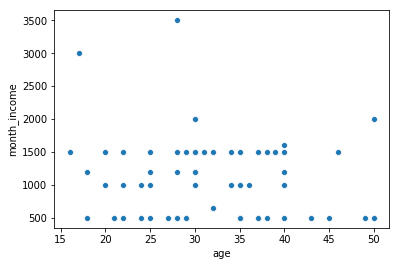

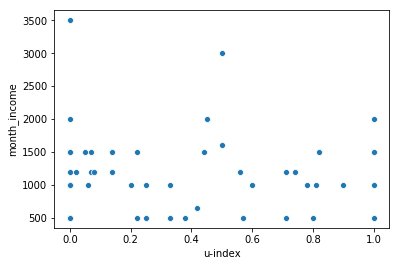

In [12]:
sns.scatterplot(x='age',y='month_income',data=raw)
plt.show()
sns.scatterplot(x='u-index',y='month_income', data=raw)

In [13]:
'''#A quick visuaization,
sns.set(style='whitegrid',palette='dark')
g = sns.PairGrid(happy, diag_sharey=False)

g.map_upper(plt.scatter, alpha=.5)

g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

g.map_diag(sns.kdeplot, lw=3)
plt.show()'''

"#A quick visuaization,\nsns.set(style='whitegrid',palette='dark')\ng = sns.PairGrid(happy, diag_sharey=False)\n\ng.map_upper(plt.scatter, alpha=.5)\n\ng.map_lower(sns.regplot, scatter_kws=dict(alpha=0))\n\ng.map_diag(sns.kdeplot, lw=3)\nplt.show()"

In [14]:
happy.head()

,age,education,household,children,health_satis,self_satis,personal_satis,friend_satis,living_satis,overall_satis,...,pain,sleep_hours,sleep_quality,experience,minutes_work,month_income,migrant,job_satis,u-index,occup
0,30,0,5,3.0,3,3,4.0,2.0,4,4,...,1,480,3,24,540.0,1200,0,5,0.56,0
1,40,0,5,5.0,5,2,2.0,2.0,2,2,...,1,480,1,120,780.0,1600,0,2,0.50,0
2,30,7,5,3.0,3,2,2.0,1.0,5,2,...,0,420,1,54,600.0,1200,0,1,0.00,0
3,30,0,5,4.0,2,1,1.0,1.0,4,4,...,1,480,1,96,600.0,1200,1,4,0.07,0
4,30,0,5,3.0,3,1,2.0,3.0,3,4,...,0,480,3,24,540.0,1500,0,2,0.82,0


/root/.pyenv/versions/jupyter3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


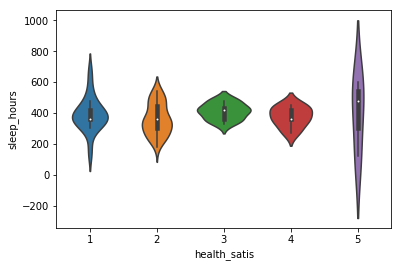

In [15]:
sns.violinplot(x='health_satis',y='sleep_hours',data=happy)

/root/.pyenv/versions/jupyter3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


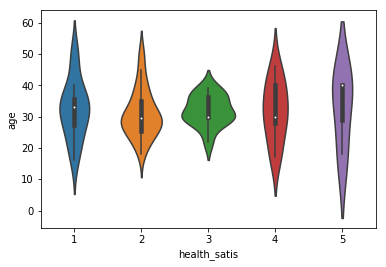

In [16]:
sns.violinplot(x='health_satis',y='age',data=happy)

/root/.pyenv/versions/jupyter3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


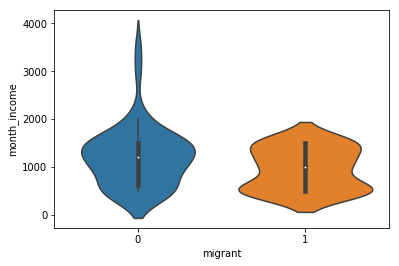

In [17]:
sns.violinplot(x='migrant',y='month_income',data=happy)

/root/.pyenv/versions/jupyter3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


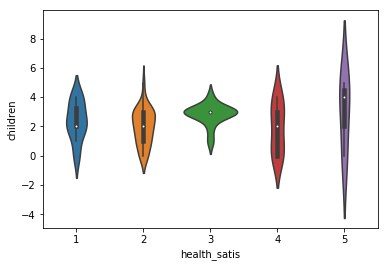

In [18]:
sns.violinplot(x='health_satis',y='children',data=happy)

/root/.pyenv/versions/jupyter3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


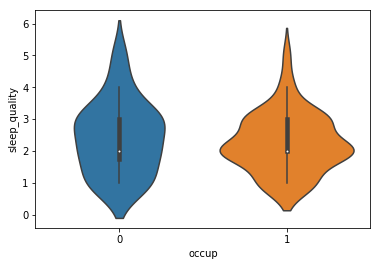

In [19]:
sns.violinplot(x='occup',y='sleep_quality',data=happy)

/root/.pyenv/versions/jupyter3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


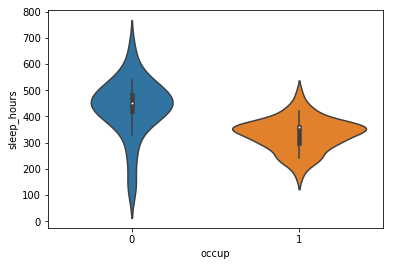

In [20]:
sns.violinplot(x='occup',y='sleep_hours',data=happy)

/root/.pyenv/versions/jupyter3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


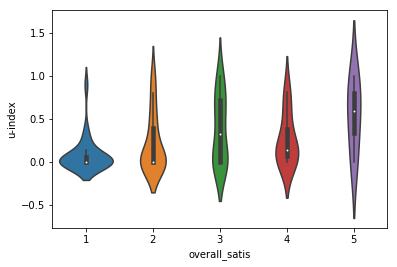

In [21]:
sns.violinplot(x='overall_satis',y='u-index',data=happy)

/root/.pyenv/versions/jupyter3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


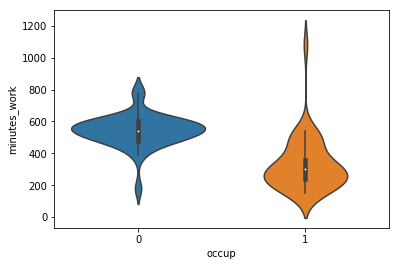

In [22]:
sns.violinplot(x='occup',y='minutes_work',data=happy)

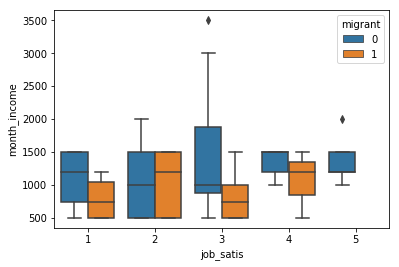

In [23]:
sns.boxplot(x='job_satis', y='month_income', hue='migrant',data=happy)

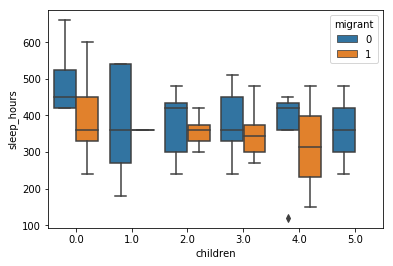

In [24]:
sns.boxplot(x='children', y='sleep_hours', hue='migrant',data=happy)

### Run regression

In [25]:
y = happy['u-index'] #delcare target/outcome 
X = happy.drop(['u-index'],1) #delcare attributes/coefficients

In [26]:
lr = LinearRegression() #instantiate a linear regression from sklearn
lr.fit(X,y) #fit the model
lr.score(X,y) #see the score (r2)

0.6557471422243704

/root/.pyenv/versions/jupyter3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


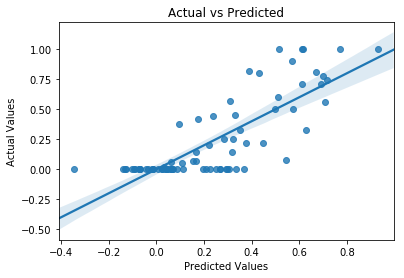

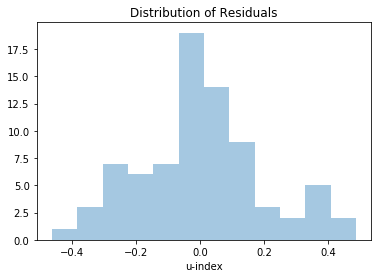

In [27]:
#Plot predicted vs acutal and residuals
predicted = lr.predict(X)
sns.regplot(x=predicted,y=happy['u-index'])
plt.title("Actual vs Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()
residuals = y - predicted
sns.distplot(residuals,kde=False)
plt.title("Distribution of Residuals")
plt.show()

In [28]:
#Do regression with statsmodels module
stats_mod = happy.copy()
stats_mod.rename({'u-index': 'uindex'},axis=1,inplace=True)

In [29]:
def regstats (regr):
    print('Coefficients:\n{}\n'.format(lm.params))
    print('p-values:\n{}\n'.format(lm.pvalues))
    print('R-Squared:\n{}\n'.format(lm.rsquared))
    print('Confidence Interval:\n{}'.format(lm.conf_int()))
   
    
#function to return concerned indicators
def modelstats (lm):
    plt.figure()
    plt.hist(lm.resid)
    plt.title('Residual counts')
    plt.xlabel('Residual')
    plt.ylabel('Count')
    plt.show()
    plt.figure()
    plt.scatter(lm.predict(), lm.resid)
    plt.xlabel("Predicted")
    plt.ylabel("Residual")
    plt.axhline(y=0,color='red')
    plt.title('Predicted vs Residual')
    plt.show()
    regstats(lm)
    print("Residuals mean: {}".format(sum(lm.resid)/len(lm.resid)))

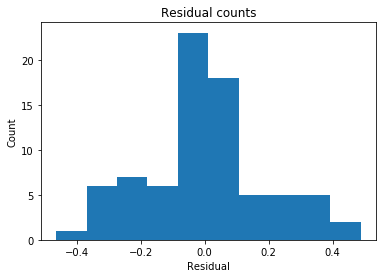

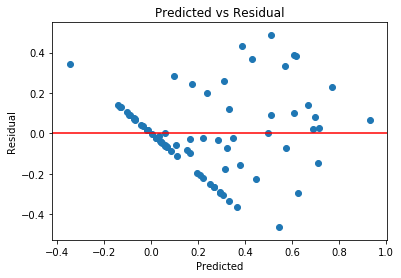

Coefficients:
Intercept        -0.347486
age               0.004770
education         0.011382
household        -0.027236
children          0.001141
health_satis     -0.017599
self_satis        0.041145
personal_satis    0.038875
friend_satis      0.078670
living_satis     -0.028036
overall_satis    -0.004305
depressed         0.315825
pain              0.044889
sleep_hours      -0.000111
sleep_quality     0.029555
experience        0.000494
minutes_work      0.000302
month_income     -0.000088
migrant           0.089823
job_satis         0.065319
occup            -0.223003
dtype: float64

p-values:
Intercept         0.228861
age               0.386045
education         0.285287
household         0.228349
children          0.971825
health_satis      0.605878
self_satis        0.303015
personal_satis    0.211726
friend_satis      0.022578
living_satis      0.345129
overall_satis     0.895944
depressed         0.000037
pain              0.554332
sleep_hours       0.784553
sleep_quality  

In [30]:
lform = 'uindex ~ age+education+household+children+health_satis+self_satis+personal_satis+friend_satis+living_satis+overall_satis+depressed+pain+sleep_hours+sleep_quality+experience+minutes_work+month_income+migrant+job_satis+occup'
lm = smf.ols(formula=lform, data=stats_mod).fit()
modelstats(lm)

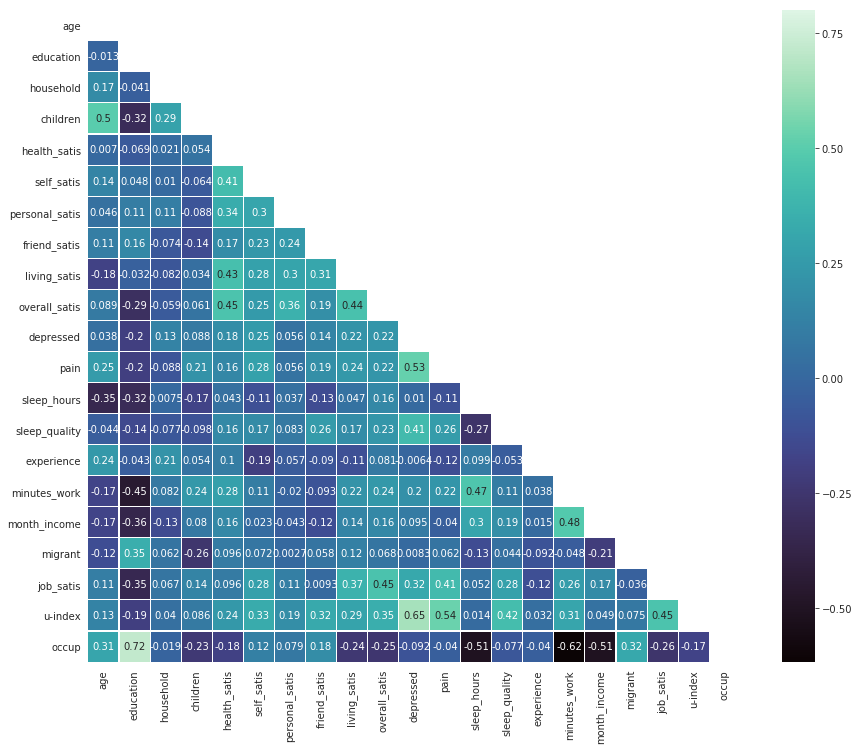

In [31]:
#create heat map to show correlation between variables.
corrmat = happy.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
    
with sns.axes_style('white'):    
    ax = plt.subplots(figsize=(15,12))

    sns.heatmap(corrmat,
            vmax=.8, 
            cmap="mako",
            annot=True,
            linewidth=.05,
            square=True,
            mask=mask)


plt.show()

/root/.pyenv/versions/jupyter3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


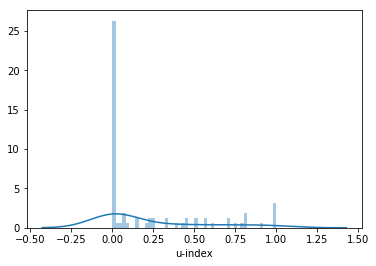

In [32]:
#get info about the target variable
happy['u-index'].describe()
sns.distplot(happy['u-index'],bins=50,kde=True)

#### So far, through all of the visualizations it doesn't surprise me that the Rsquared for the regression is only at 65%. Since one can have a 0 u-index score, but the variable is continuous, this will complicate the model. With the U-index as the outcome we are interested in predicting, the data seems more geared towards a classification problem. ie 0 = not unhappy and 1 = unhappy.
#### Generally the sample would be divided into two portions. Those that are unhappy a certain percentage of the time, and those that are not unhappy.  
#### But at what percentage of time spent unhappy would we consider one generally unhappy?
#### To answer this, we can use a combination bit of scientic reasoning and statistical inference.
#### We will first separate the sample in increasing increments of 5% of time spent unhappy, then using ttests we can determine the significance in difference between the two groups for each attribute, given their U-index classification

In [33]:
#create a loop to find the separation in u-index at which the two groups would have the most significant differences
pvals = []
separation = []
dist = []
for i in np.arange(.05,.95,.05): #separate data adding .05 each time
    ldf = raw.copy()
    #function to convert to binary based on 5% changes
    def label_unhappy (row):
        if row['u-index'] < i:
            return 0
        if row['u-index'] >= i:
            return 1
    ldf['u-index'] = ldf.apply(lambda row: label_unhappy (row),axis=1) #apply label function
    separation.append(round(i,4)) #append value used to sep groups
    dist.append(ldf['u-index'].mean()*100)#% of sample unhappy
    pvalsi =[] #collect p-vals
    for col in ldf.loc[:, ~(ldf.columns).isin(['u-index'])]: #run the ttests between u-index and all other attributes
        tstat = stats.ttest_ind(
        ldf[ldf['u-index'] == 0 ][col].dropna(),
        ldf[ldf['u-index'] == 1 ][col].dropna())
        pvalsi.append(tstat[1]) #append p val for each attriute
    pvals.append(pvalsi) #append array for p-vals for this iteration

In [34]:
#creat a dataframe to store the pvals of each iteration
division = pd.DataFrame(pvals) 
#transpose the pval arrays to match the separation intervals
division = division.T

In [35]:
division.columns = separation #label DF columuns
division.index = happy.drop(['u-index'],1).columns #label rows with attributes
division.round(4) #round entire DF to 4 decimal 

# turn pvals to binary, insignificant atts = 0, otherwise 1
for col in division:
    division[col] = np.where(division[col]>.05,0,1)

In [36]:
#Count significant differences
div_sigs = []
for col in division:
    div_sigs.append(division[col].sum())

We have gathered our indicators, now we can plot the data to help us decide where we want to devide the sample.

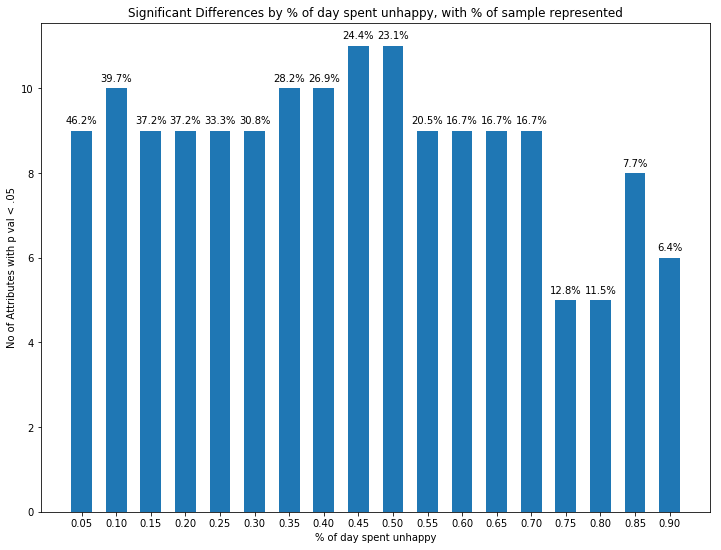

In [37]:
plt.figure(figsize=(12,9)) # instatiate a matplotlib figure
width = 0.03      # the width of the bars: can also be len(x) sequence

ax = plt.bar(separation, div_sigs, width) #bar plot

rects = ax.patches #ax.patches returns the dimensions of the bars in the bar chart

#Create a loop to iterate over each bar and annotate the percentage of the sample represented at that division
for rect in rects:
    y_value = rect.get_height() # Get X and Y placement of label from rect.
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5  # number of points between bar and label.
    va = 'bottom' # vertical alignment for positive values
    label = "{:.1f}%".format(dist[rects.index(rect)]) #call index position of rect from dist list

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)          

plt.xticks(np.arange(.05,.95,.05))
plt.title("Significant Differences by % of day spent unhappy, with % of sample represented")
plt.ylabel("No of Attributes with p val < .05")
plt.xlabel('% of day spent unhappy')
plt.show()



From this bar chart, we can see that there is the largest difference in those who spend 45-50% of their day unhappy. One thing to consider is also the percent of the sample that this division represents. If we were to divide the sample between those who spend more than 45% of the time unhappy and those who spend less time unhappy, this would represent a data set with ~25% unhappy and 75% not unhappy. Using scientific reasoning, it could be reasonable to say "If you spend more than 45% of your day unhappy, then you are generally unhappy."
For model testing purposes, we will model three divisions, 0% unhappy (balanced classes), 25% percent of time spent unhappy, and 45% of time spent unhappy.

## Prepare the data for modeling

In [38]:
#Create columns for chosen separation results
model = raw.copy()
#List the separation points for the sample
seps = [0,25,45]
#loops to add columns
for i in seps:
    def label_unhappy (row):
        if row['u-index'] <= i/100:
            return 0
        if row['u-index'] > i/100:
            return 1
    model['s'+str(i)] = model.apply(lambda row: label_unhappy (row), axis=1)
model.drop(['u-index'],1,inplace=True)

In [39]:
model.head()

,age,education,household,children,health_satis,self_satis,personal_satis,friend_satis,living_satis,overall_satis,...,sleep_quality,experience,minutes_work,month_income,migrant,job_satis,occup,s0,s25,s45
0,30,0,5,3.0,3,3,4.0,2.0,4,4,...,3,24,540.0,1200,0,5,0,1,1,1
1,40,0,5,5.0,5,2,2.0,2.0,2,2,...,1,120,780.0,1600,0,2,0,1,1,1
2,30,7,5,3.0,3,2,2.0,1.0,5,2,...,1,54,600.0,1200,0,1,0,0,0,0
3,30,0,5,4.0,2,1,1.0,1.0,4,4,...,1,96,600.0,1200,1,4,0,1,0,0
4,30,0,5,3.0,3,1,2.0,3.0,3,4,...,3,24,540.0,1500,0,2,0,1,1,1


In [40]:
#create target/attributes for each separation
s0 = model['s0']
s25 = model['s25']
s45 = model['s45']
u_inds = [s0, s25, s45]
labels = ['s0','s25','s45']
X = model.drop(['s0','s25','s45'],1)


### Because the outcome was converted in binary, we will try a series of classification methods starting with a Logistic regression, the 'C' regularization paramenter is set to 3 for the L2 (ridge) penalty and the L1 (lasso). 

Ridge C=3 for s0
CrossValidation 5 cv : [0.76470588 0.8125     0.93333333 0.86666667 0.53333333]
ROC_AUC score: 0.9620962425840475
 0,0 : Correctly Classified Negatives
 0,1 : False Positives (Type I Error) 
 1,0 : False Negatives (Type II Error) 
 1,1 : Correctly Classified Positives


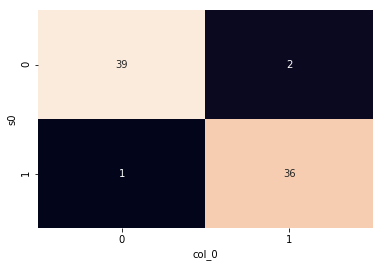


Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.95      0.97      0.96        37

   micro avg       0.96      0.96      0.96        78
   macro avg       0.96      0.96      0.96        78
weighted avg       0.96      0.96      0.96        78


Lasso C=2 for s0
Cross Validation Score cv=5: [0.82352941 0.6875     0.93333333 0.86666667 0.46666667]
ROC_AUC score: 0.9620962425840475
 0,0 : Correctly Classified Negatives
 0,1 : False Positives (Type I Error) 
 1,0 : False Negatives (Type II Error) 
 1,1 : Correctly Classified Positives


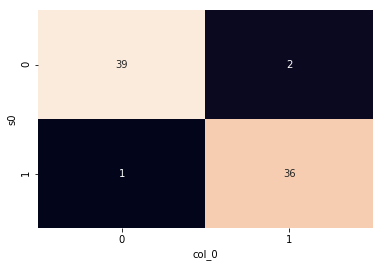


Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.95      0.97      0.96        37

   micro avg       0.96      0.96      0.96        78
   macro avg       0.96      0.96      0.96        78
weighted avg       0.96      0.96      0.96        78


Ridge C=3 for s25
CrossValidation 5 cv : [0.625      0.875      0.8125     0.6875     0.78571429]
ROC_AUC score: 0.8773148148148148
 0,0 : Correctly Classified Negatives
 0,1 : False Positives (Type I Error) 
 1,0 : False Negatives (Type II Error) 
 1,1 : Correctly Classified Positives


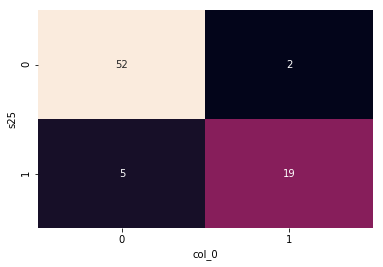


Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        54
           1       0.90      0.79      0.84        24

   micro avg       0.91      0.91      0.91        78
   macro avg       0.91      0.88      0.89        78
weighted avg       0.91      0.91      0.91        78


Lasso C=2 for s25
Cross Validation Score cv=5: [0.5625     0.8125     0.75       0.6875     0.85714286]
ROC_AUC score: 0.8981481481481483
 0,0 : Correctly Classified Negatives
 0,1 : False Positives (Type I Error) 
 1,0 : False Negatives (Type II Error) 
 1,1 : Correctly Classified Positives


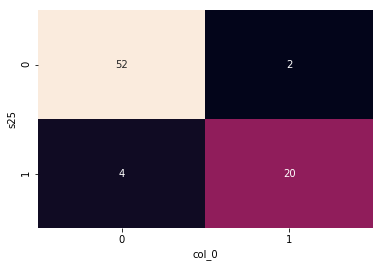


Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        54
           1       0.91      0.83      0.87        24

   micro avg       0.92      0.92      0.92        78
   macro avg       0.92      0.90      0.91        78
weighted avg       0.92      0.92      0.92        78


Ridge C=3 for s45
CrossValidation 5 cv : [0.75       0.5625     0.625      1.         0.86666667]
ROC_AUC score: 0.9722222222222222
 0,0 : Correctly Classified Negatives
 0,1 : False Positives (Type I Error) 
 1,0 : False Negatives (Type II Error) 
 1,1 : Correctly Classified Positives


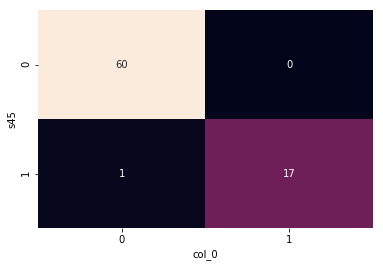


Classification Report : 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.94      0.97        18

   micro avg       0.99      0.99      0.99        78
   macro avg       0.99      0.97      0.98        78
weighted avg       0.99      0.99      0.99        78


Lasso C=2 for s45
Cross Validation Score cv=5: [0.75       0.75       0.625      0.93333333 0.86666667]
ROC_AUC score: 0.9916666666666666
 0,0 : Correctly Classified Negatives
 0,1 : False Positives (Type I Error) 
 1,0 : False Negatives (Type II Error) 
 1,1 : Correctly Classified Positives


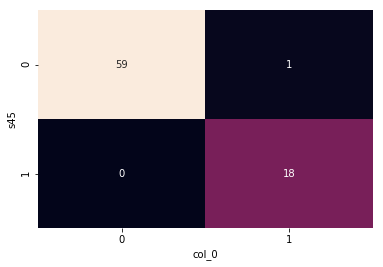


Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.95      1.00      0.97        18

   micro avg       0.99      0.99      0.99        78
   macro avg       0.97      0.99      0.98        78
weighted avg       0.99      0.99      0.99        78




In [47]:
for i, j in zip(u_inds, labels):
    lrc = LogisticRegression(C=3, solver='liblinear')  
    lrc.fit(X,i)   
    pred0 = lrc.predict(X)    
    print("Ridge C=3 for {}".format(j))
    print("CrossValidation 5 cv : {}".format(cross_val_score(lrc,X,i,cv=5)))
    print("ROC_AUC score: {}".format(roc_auc_score(i,pred0)))
    print(' 0,0 : Correctly Classified Negatives\n 0,1 : False Positives (Type I Error) \n 1,0 : False Negatives (Type II Error) \n 1,1 : Correctly Classified Positives')
    conmat = pd.crosstab(i,pred0)
    sns.heatmap(conmat, annot=True, cbar=False)
    plt.show()
    print("\nClassification Report : \n{}\n".format(classification_report(i,pred0)))
    lrc_w = LogisticRegression(penalty='l1',C=2, solver='liblinear')
    lrc_w.fit(X,i)
    pred1 = lrc_w.predict(X)
    print("Lasso C=2 for {}".format(j))
    print("Cross Validation Score cv=5: {}".format(cross_val_score(lrc_w,X,i,cv=5)))
    print("ROC_AUC score: {}".format(roc_auc_score(i,pred1)))
    print(' 0,0 : Correctly Classified Negatives\n 0,1 : False Positives (Type I Error) \n 1,0 : False Negatives (Type II Error) \n 1,1 : Correctly Classified Positives')
    conmat = pd.crosstab(i,pred1)
    sns.heatmap(conmat, annot=True, cbar=False)
    plt.show()
    print("\nClassification Report : \n{}\n".format(classification_report(i,pred1)))